## Investigate the drugs submitted to the FDA

DailyMed provides high quality information about marketed drugs. This information includes FDA labels (package inserts). This data set can be found on healthdata.gov

### Query data

Import all the modules we expect to use for cleaning, analysis, visualization, and machine learning.

In [3]:
import pandas as pd
import json, requests, csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

Use request and json to load and extract online data via DailyMed Restful API. There are a base URI and several extensions. 

In [16]:
urlspls='https://dailymed.nlm.nih.gov/dailymed/services/v2/spls.json'

dea_schedule_code=['C48675','C48676','C48677','C48679','C48672','none']
dea='dea_schedule_code'
warning='boxed_warning'
boxed_warning=['true', 'false']

Define a function called totalpages to be used in another function. The purpose of this function is to find the pages for category variables and then extact the data and add them to additional columns in the table.

In [10]:
def totalpages(url, category, column):
    categorypages=[]
    for i in category:        
        parameters = {column: i, "pagesize": 100, "page": 1}
        r = requests.get(url,params=parameters)
        r.raise_for_status()
        file_parsed = json.loads(r.text)
        totalpages=file_parsed["metadata"]["total_pages"]
        categorypages.append(totalpages)
    return categorypages

In [18]:
# get the page of each dea_schedule_code category
pageofcode=totalpages(urlspls, dea_schedule_code, dea)
print(pageofcode)

[11, 6, 16, 3, 0, 1077]


In [5]:
# get the page of each boxed_warning category
pageofcode2=totalpages(urlspls, boxed_warning, warning)
print(pageofcode2)

[126, 985]


Define a function named desireddata to write the json data into csv files based on the url and the extension that is desired. 

In [11]:
def desireddata(url, category, column):
    pages=totalpages(url, category, column)
    for i in range(len(category)):        
        
        p=1
        while p <=pages[i]:
            parameters = {column: category[i], "pagesize": 100, "page": p}
            r = requests.get(url,params=parameters)
            r.raise_for_status()
            file_parsed = json.loads(r.text)
            files = file_parsed["data"]
                
            if p==1:
                with open(category[i]+'.csv', 'w', encoding='utf-8', newline='') as f:
                    csvwriter = csv.writer(f)
                    count=0
                    for file in files:
                        if count == 0:
                            header = file.keys()
                            csvwriter.writerow(header)
                            count += 1
                        csvwriter.writerow(file.values())
            elif p>1:
                with open(category[i]+'.csv', 'a', encoding='utf-8', newline='') as f:
                    csvwriter = csv.writer(f)
                    for file in files:
                        csvwriter.writerow(file.values())
            p+=1
                
#             if p>100:
#                 break             
        

In [20]:
desireddata(urlspls, dea_schedule_code, dea)

In [21]:
df1=pd.read_csv('none.csv')
df3=pd.read_csv('C48675.csv')
df4=pd.read_csv('C48676.csv')
df5=pd.read_csv('C48677.csv')
df6=pd.read_csv('C48679.csv')

In [22]:
df1.head()

,spl_version,published_date,title,setid
0,10,"Jun 19, 2019","PYRIDOSTIGMINE BROMIDE TABLET, EXTENDED RELEAS...",013a6524-6eb9-4dbf-b29c-9aec2f40d2d0
1,9,"Jun 19, 2019","FLURBIPROFEN TABLET, FILM COATED [PD-RX PHARMA...",0585c6bf-e401-4112-b4b4-c8d56c3b0f1c
2,11,"Jun 19, 2019",CLOPIDOGREL TABLET [MACLEODS PHARMACEUTICALS L...,063cd1eb-98fd-422e-8145-bba04c497efe
3,9,"Jun 19, 2019","DOCETAXEL INJECTION, SOLUTION, CONCENTRATE [JI...",07a538b3-2cf1-40e1-871f-f932863eb3a3
4,4,"Jun 19, 2019",CLINDAMYCIN PALMITATE HYDROCHLORIDE (PEDIATRIC...,0800afad-e4cd-4f70-aaa1-a14547be4729


In [23]:
df1['dea_schedule_code']='none'
df3['dea_schedule_code']='CII'
df4['dea_schedule_code']='CIII'
df5['dea_schedule_code']='CIV'
df6['dea_schedule_code']='CV'

In [24]:
# concatenate the dataframes of dea schedule code
df_spls=pd.concat([df1, df3,df4,df5,df6], ignore_index=True)

In [25]:
df_spls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110975 entries, 0 to 110974
Data columns (total 5 columns):
spl_version          110975 non-null int64
published_date       110975 non-null object
title                110881 non-null object
setid                110975 non-null object
dea_schedule_code    110975 non-null object
dtypes: int64(1), object(4)
memory usage: 4.2+ MB


In [26]:
desireddata(urlspls, boxed_warning, warning)

In [28]:
df7=pd.read_csv('true.csv')
df8=pd.read_csv('false.csv')

In [29]:
df7['boxed_warning']=True
df8['boxed_warning']=False

In [30]:
# concatenate the dataframes of boxed warning
df_spls2=pd.concat([df7,df8],ignore_index=True)

In [31]:
df_spls2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110974 entries, 0 to 110973
Data columns (total 5 columns):
spl_version       110974 non-null int64
published_date    110974 non-null object
title             110880 non-null object
setid             110974 non-null object
boxed_warning     110974 non-null bool
dtypes: bool(1), int64(1), object(3)
memory usage: 3.5+ MB


In [32]:
df_spls2.tail()

,spl_version,published_date,title,setid,boxed_warning
110969,1,"Jul 25, 2006",ENLON-PLUS (EDROPHONIUM CHLORIDE AND ATROPINE ...,bdeb47eb-e538-498d-ae98-14d5db29eab0,False
110970,1,"Jul 25, 2006","UROBIOTIC (OXYTETRACYCLINE HYDROCHLORIDE, SULF...",be27854a-a805-4300-9729-accd1b7f226f,False
110971,1,"Jul 25, 2006",HYDROCODONE BITARTRATE AND ACETAMINOPHEN (HYDR...,e728d78e-242f-4a43-bb08-5e467cbfb4b7,False
110972,1,"Jul 18, 2006","PLASMA-LYTE R (SODIUM CHLORIDE, POTASSIUM CHLO...",1f32c7ce-8ec1-43d1-8e24-e7d486194938,False
110973,1,"Jul 18, 2006",PSORCON (DIFLORASONE DIACETATE) OINTMENT [DERM...,29c78a72-3dde-493f-b6a2-f286bec1f09e,False


In [33]:
df_spls3=df_spls2[['setid','boxed_warning']]

In [34]:
df_spls3.head()

,setid,boxed_warning
0,0585c6bf-e401-4112-b4b4-c8d56c3b0f1c,True
1,063cd1eb-98fd-422e-8145-bba04c497efe,True
2,07a538b3-2cf1-40e1-871f-f932863eb3a3,True
3,0800afad-e4cd-4f70-aaa1-a14547be4729,True
4,2ec5c30f-4eb8-48a5-83c4-236450413464,True


#### Merge dataframes

Add two addtional columns 'dea_schedule_code' and 'boxed_warning' to the data set extract from 'https://dailymed.nlm.nih.gov/dailymed/services/v2/spls.json'

In [35]:
df_spls_all = pd.merge(df_spls, df_spls3, on='setid')

In [36]:
df_spls_all.head()

,spl_version,published_date,title,setid,dea_schedule_code,boxed_warning
0,10,"Jun 19, 2019","PYRIDOSTIGMINE BROMIDE TABLET, EXTENDED RELEAS...",013a6524-6eb9-4dbf-b29c-9aec2f40d2d0,none,False
1,9,"Jun 19, 2019","FLURBIPROFEN TABLET, FILM COATED [PD-RX PHARMA...",0585c6bf-e401-4112-b4b4-c8d56c3b0f1c,none,True
2,11,"Jun 19, 2019",CLOPIDOGREL TABLET [MACLEODS PHARMACEUTICALS L...,063cd1eb-98fd-422e-8145-bba04c497efe,none,True
3,9,"Jun 19, 2019","DOCETAXEL INJECTION, SOLUTION, CONCENTRATE [JI...",07a538b3-2cf1-40e1-871f-f932863eb3a3,none,True
4,4,"Jun 19, 2019",CLINDAMYCIN PALMITATE HYDROCHLORIDE (PEDIATRIC...,0800afad-e4cd-4f70-aaa1-a14547be4729,none,True


In [37]:
df_spls_all.tail()

,spl_version,published_date,title,setid,dea_schedule_code,boxed_warning
110970,1,"Mar 30, 2010",DIPHENOXYLATE HCL AND ATROPINE SULFATE TABLET ...,542b6ceb-7ad4-4d0d-b604-79bd1f567d79,CV,False
110971,1,"Jan 25, 2010",FEXOFENADINE HYDROCHLORIDE AND PSEUDOEPHEDRINE...,cf6676ff-1122-4495-b64d-f70771a09633,CV,False
110972,1,"Nov 13, 2009",LOMOTIL (DIPHENOXYLATE HYDROCHLORIDE) TABLET [...,d2b171be-ac59-48ec-84da-03d3f2d34ca6,CV,False
110973,1,"Mar 20, 2009","PSEUDODINE C (TRIPROLIDINE HYDROCHLORIDE, PSEU...",dd62a5eb-dd5a-4329-8696-07acb555af10,CV,False
110974,1,"Dec 22, 2006",ACETAMINOPHEN AND CODEINE PHOSPHATE (ACETAMINO...,l95ac6875-6b14-4cde-8efb-80704e39b8d8,CV,False


In [38]:
df_spls_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110975 entries, 0 to 110974
Data columns (total 6 columns):
spl_version          110975 non-null int64
published_date       110975 non-null object
title                110881 non-null object
setid                110975 non-null object
dea_schedule_code    110975 non-null object
boxed_warning        110975 non-null bool
dtypes: bool(1), int64(1), object(4)
memory usage: 5.2+ MB


#### Clean data

In column 'title', I need to extract the manufacture and put it in another new column. Rename the 'title' as drug name

In [39]:
df_spls_all['manufacturer']=df_spls_all['title'].str.split('[').str[1]
df_spls_all['manufacturer']=df_spls_all['manufacturer'].str.strip(']')
df_spls_all['title']=df_spls_all['title'].str.split('[').str[0]
df_spls_all.rename({'title':'drug_name'}, axis=1, inplace=True)

In [40]:
df_spls_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110975 entries, 0 to 110974
Data columns (total 7 columns):
spl_version          110975 non-null int64
published_date       110975 non-null object
drug_name            110881 non-null object
setid                110975 non-null object
dea_schedule_code    110975 non-null object
boxed_warning        110975 non-null bool
manufacturer         110880 non-null object
dtypes: bool(1), int64(1), object(5)
memory usage: 6.0+ MB


In [42]:
#Delete the rows with null data
df_spls_all.dropna(how='any',axis=0, inplace=True)
df_spls_all.reset_index(drop=True, inplace=True)

In [46]:
df_spls_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110880 entries, 0 to 110879
Data columns (total 7 columns):
spl_version          110880 non-null int64
published_date       110880 non-null object
drug_name            110880 non-null object
setid                110880 non-null object
dea_schedule_code    110880 non-null object
boxed_warning        110880 non-null bool
manufacturer         110880 non-null object
dtypes: bool(1), int64(1), object(5)
memory usage: 5.2+ MB


#### Save data

The cleaned data are saved in 'marketed_drug' file

In [47]:
df_spls_all.to_csv('marketedall_drug.csv', index=False)

#### Exploratory data analysis

Insights and visualization

In [4]:
df=pd.read_csv('marketedall_drug.csv')

In [214]:
df.head()

,spl_version,published_date,drug_name,setid,dea_schedule_code,boxed_warning,manufacturer
0,10,"Jun 19, 2019","PYRIDOSTIGMINE BROMIDE TABLET, EXTENDED RELEASE",013a6524-6eb9-4dbf-b29c-9aec2f40d2d0,none,False,AMNEAL PHARMACEUTICALS OF NEW YORK LLC
1,9,"Jun 19, 2019","FLURBIPROFEN TABLET, FILM COATED",0585c6bf-e401-4112-b4b4-c8d56c3b0f1c,none,True,"PD-RX PHARMACEUTICALS, INC."
2,11,"Jun 19, 2019",CLOPIDOGREL TABLET,063cd1eb-98fd-422e-8145-bba04c497efe,none,True,MACLEODS PHARMACEUTICALS LIMITED
3,9,"Jun 19, 2019","DOCETAXEL INJECTION, SOLUTION, CONCENTRATE",07a538b3-2cf1-40e1-871f-f932863eb3a3,none,True,"JIANGSU HENGRUI MEDICINE CO., LTD."
4,4,"Jun 19, 2019",CLINDAMYCIN PALMITATE HYDROCHLORIDE (PEDIATRIC...,0800afad-e4cd-4f70-aaa1-a14547be4729,none,True,"RISING PHARMACEUTICALS, INC."


In [141]:
# Check the percentage of each manufacturer in all
df.manufacturer.value_counts(normalize=True)

REMEDYREPACK INC.                                                               0.018038
A-S MEDICATION SOLUTIONS                                                        0.018001
BOIRON                                                                          0.016035
BRYANT RANCH PREPACK                                                            0.014322
WASHINGTON HOMEOPATHIC PRODUCTS                                                 0.013429
URIEL PHARMACY INC.                                                             0.011986
NUCARE PHARMACEUTICALS,INC.                                                     0.011264
PROFICIENT RX LP                                                                0.010065
PHYSICIANS TOTAL CARE, INC.                                                     0.009867
CARDINAL HEALTH                                                                 0.009352
SMITHS MEDICAL ASD, INC.                                                        0.009208
CVS PHARMACY         

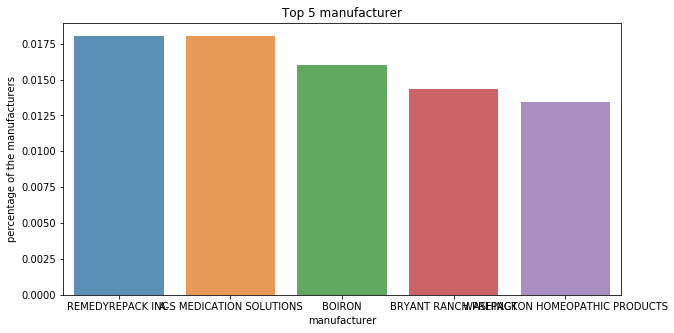

In [142]:
manufacturer_count  = df['manufacturer'].value_counts(normalize=True)
manufacturer_count = manufacturer_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(manufacturer_count.index, manufacturer_count.values, alpha=0.8)
plt.title('Top 5 manufacturer')
plt.ylabel('percentage of the manufacturers', fontsize=10)
plt.xlabel('manufacturer', fontsize=10)
plt.show()

Text(0.5, 1.0, 'Top 5 manufacturers')

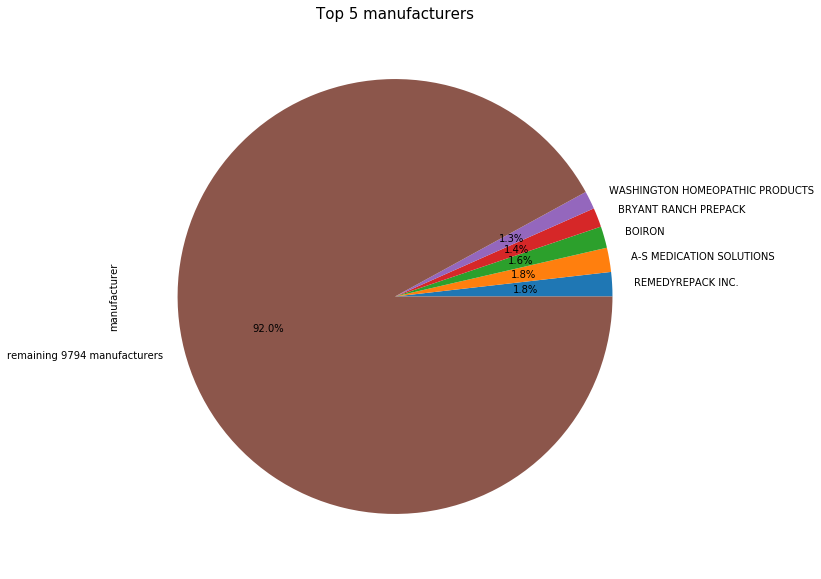

In [143]:
# pie chart of the percentage of top 5 manufacturers
temp = df['manufacturer'].value_counts(normalize=True)
temp2=temp.head(5)
if len(temp) > 5:
    temp2['remaining {0} manufacturers'.format(len(temp) - 5)] = temp[5:].sum()
temp2.plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')
plt.title('Top 5 manufacturers', fontsize=15)

In [144]:
# Check the percentage of each DEA schedule code in all
df.dea_schedule_code.value_counts(normalize=True)

none    0.970112
CIV     0.014051
CII     0.009316
CIII    0.004690
CV      0.001831
Name: dea_schedule_code, dtype: float64

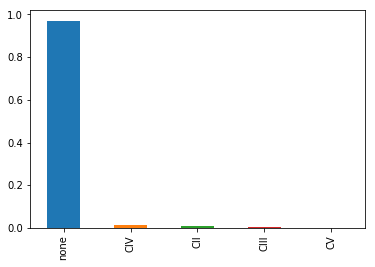

In [145]:
# bar chart of the percentage of each DEA schedule code in all
df.dea_schedule_code.value_counts(normalize=True).plot(kind='bar')

Check the box warnings from each manufacturer

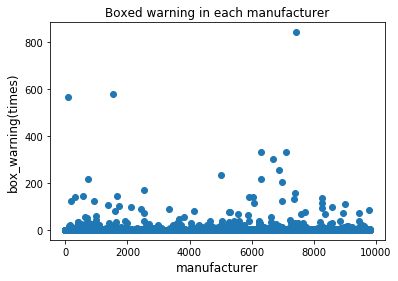

In [146]:
df_ma_bo=df.groupby('manufacturer',as_index=False)['boxed_warning'].sum()
plt.scatter(df_ma_bo.index, df_ma_bo['boxed_warning'])
plt.xlabel('manufacturer', fontsize=12)
plt.ylabel('box_warning(times)', fontsize=12)
plt.title('Boxed warning in each manufacturer')
plt.show()

In [147]:
df.groupby('manufacturer',as_index=True)['boxed_warning'].sum().sort_values(ascending=False)

manufacturer
REMEDYREPACK INC.                                                    841.0
BRYANT RANCH PREPACK                                                 578.0
A-S MEDICATION SOLUTIONS                                             564.0
PROFICIENT RX LP                                                     333.0
NUCARE PHARMACEUTICALS,INC.                                          332.0
PD-RX PHARMACEUTICALS, INC.                                          303.0
PHYSICIANS TOTAL CARE, INC.                                          253.0
LAKE ERIE MEDICAL DBA QUALITY CARE PRODUCTS LLC                      234.0
NUCARE PHARMACEUTICALS, INC.                                         218.0
APHENA PHARMA SOLUTIONS - TENNESSEE, LLC                             217.0
PREFERRED PHARMACEUTICALS INC.                                       202.0
DIRECT RX                                                            170.0
REDPHARM DRUG, INC.                                                  155.0
AMERICAN HEA

In [170]:
df.groupby('manufacturer',as_index=True)['boxed_warning'].sum().sort_values(ascending=False)/df.boxed_warning.sum()

manufacturer
REMEDYREPACK INC.                                                    0.067221
BRYANT RANCH PREPACK                                                 0.046199
A-S MEDICATION SOLUTIONS                                             0.045080
PROFICIENT RX LP                                                     0.026617
NUCARE PHARMACEUTICALS,INC.                                          0.026537
PD-RX PHARMACEUTICALS, INC.                                          0.024219
PHYSICIANS TOTAL CARE, INC.                                          0.020222
LAKE ERIE MEDICAL DBA QUALITY CARE PRODUCTS LLC                      0.018704
NUCARE PHARMACEUTICALS, INC.                                         0.017425
APHENA PHARMA SOLUTIONS - TENNESSEE, LLC                             0.017345
PREFERRED PHARMACEUTICALS INC.                                       0.016146
DIRECT RX                                                            0.013588
REDPHARM DRUG, INC.                                

Text(0.5, 1.0, 'Manufacturers with top 5 boxed warnings')

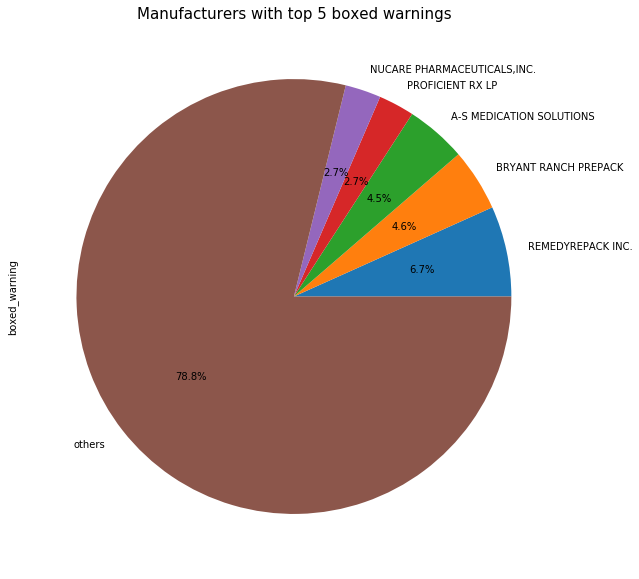

In [171]:
warning = df.groupby('manufacturer',as_index=True)['boxed_warning'].sum().sort_values(ascending=False)
warning2=warning.head(5)
if len(warning) > 5:
    warning2['others'] = warning[5:].sum()
warning2.plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')
plt.title('Manufacturers with top 5 boxed warnings', fontsize=15)

In [5]:
df['controlled_substance'] = df['dea_schedule_code']
df.loc[df['dea_schedule_code'] == 'none', 'controlled_substance'] = False
df.loc[df['dea_schedule_code'] == 'CII', 'controlled_substance'] = True
df.loc[df['dea_schedule_code'] == 'CIII', 'controlled_substance'] = True
df.loc[df['dea_schedule_code'] == 'CIV', 'controlled_substance'] = True
df.loc[df['dea_schedule_code'] == 'CV', 'controlled_substance'] = True

In [221]:
df.head()

,spl_version,published_date,drug_name,setid,dea_schedule_code,boxed_warning,manufacturer,controlled_substance
0,10,"Jun 19, 2019","PYRIDOSTIGMINE BROMIDE TABLET, EXTENDED RELEASE",013a6524-6eb9-4dbf-b29c-9aec2f40d2d0,none,False,AMNEAL PHARMACEUTICALS OF NEW YORK LLC,False
1,9,"Jun 19, 2019","FLURBIPROFEN TABLET, FILM COATED",0585c6bf-e401-4112-b4b4-c8d56c3b0f1c,none,True,"PD-RX PHARMACEUTICALS, INC.",False
2,11,"Jun 19, 2019",CLOPIDOGREL TABLET,063cd1eb-98fd-422e-8145-bba04c497efe,none,True,MACLEODS PHARMACEUTICALS LIMITED,False
3,9,"Jun 19, 2019","DOCETAXEL INJECTION, SOLUTION, CONCENTRATE",07a538b3-2cf1-40e1-871f-f932863eb3a3,none,True,"JIANGSU HENGRUI MEDICINE CO., LTD.",False
4,4,"Jun 19, 2019",CLINDAMYCIN PALMITATE HYDROCHLORIDE (PEDIATRIC...,0800afad-e4cd-4f70-aaa1-a14547be4729,none,True,"RISING PHARMACEUTICALS, INC.",False


In [174]:
df.controlled_substance.value_counts()

False    107566
True       3314
Name: controlled_substance, dtype: int64

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110880 entries, 0 to 110879
Data columns (total 8 columns):
spl_version             110880 non-null int64
published_date          110880 non-null object
drug_name               110846 non-null object
setid                   110880 non-null object
dea_schedule_code       110880 non-null object
boxed_warning           110880 non-null bool
manufacturer            110880 non-null object
controlled_substance    110880 non-null bool
dtypes: bool(2), int64(1), object(5)
memory usage: 5.3+ MB


In [182]:
df.groupby('manufacturer')['controlled_substance'].sum().sort_values(ascending=False)/df.controlled_substance.sum()

manufacturer
BRYANT RANCH PREPACK                               0.060048
A-S MEDICATION SOLUTIONS                           0.037719
LAKE ERIE MEDICAL DBA QUALITY CARE PRODUCTS LLC    0.031080
PHYSICIANS TOTAL CARE, INC.                        0.029270
PROFICIENT RX LP                                   0.028063
APHENA PHARMA SOLUTIONS - TENNESSEE, LLC           0.024442
STAT RX USA LLC                                    0.024140
REMEDYREPACK INC.                                  0.023235
REBEL DISTRIBUTORS CORP                            0.019312
PD-RX PHARMACEUTICALS, INC.                        0.019312
REDPHARM DRUG, INC.                                0.018105
AIDAREX PHARMACEUTICALS LLC                        0.017200
NUCARE PHARMACEUTICALS, INC.                       0.016295
ACTAVIS PHARMA, INC.                               0.015691
DIRECT RX                                          0.015088
NUCARE PHARMACEUTICALS,INC.                        0.014484
UNIT DOSE SERVICES         

Text(0.5, 1.0, 'Manufacturers with top 5 scheduled substance')

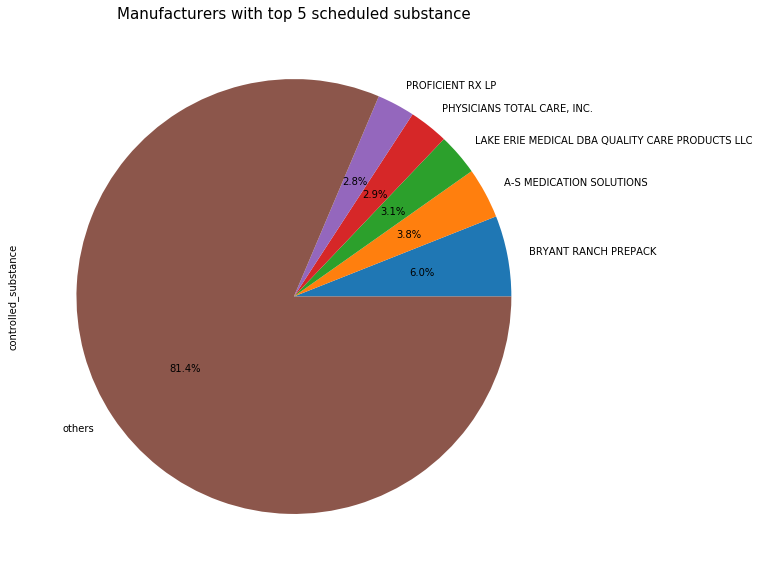

In [183]:
scheduled = df.groupby('manufacturer')['controlled_substance'].sum().sort_values(ascending=False)
scheduled2=scheduled.head(5)
if len(scheduled) > 5:
    scheduled2['others'] = scheduled[5:].sum()
scheduled2.plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')
plt.title('Manufacturers with top 5 scheduled substance', fontsize=15)

##### Machine learning

I use the logistic regression model

Get dummy variables for column 'boxed_warning' and 'dea_schedule_warning'

In [229]:
df[['boxed_warning', 'no_boxed_warning']]=pd.get_dummies(df['boxed_warning'])

In [231]:
#drop one baseline column
df=df.drop('no_boxed_warning', axis=1)

In [232]:
df.head()

,spl_version,published_date,drug_name,setid,dea_schedule_code,boxed_warning,manufacturer,controlled_substance
0,10,"Jun 19, 2019","PYRIDOSTIGMINE BROMIDE TABLET, EXTENDED RELEASE",013a6524-6eb9-4dbf-b29c-9aec2f40d2d0,none,1,AMNEAL PHARMACEUTICALS OF NEW YORK LLC,False
1,9,"Jun 19, 2019","FLURBIPROFEN TABLET, FILM COATED",0585c6bf-e401-4112-b4b4-c8d56c3b0f1c,none,0,"PD-RX PHARMACEUTICALS, INC.",False
2,11,"Jun 19, 2019",CLOPIDOGREL TABLET,063cd1eb-98fd-422e-8145-bba04c497efe,none,0,MACLEODS PHARMACEUTICALS LIMITED,False
3,9,"Jun 19, 2019","DOCETAXEL INJECTION, SOLUTION, CONCENTRATE",07a538b3-2cf1-40e1-871f-f932863eb3a3,none,0,"JIANGSU HENGRUI MEDICINE CO., LTD.",False
4,4,"Jun 19, 2019",CLINDAMYCIN PALMITATE HYDROCHLORIDE (PEDIATRIC...,0800afad-e4cd-4f70-aaa1-a14547be4729,none,0,"RISING PHARMACEUTICALS, INC.",False


In [233]:
df[['none','CII','CIII','CIV','CV']]=pd.get_dummies(df['dea_schedule_code'])

In [236]:
#drop one baseline column
df=df.drop('CV', axis=1)

In [247]:
df.head()

,spl_version,published_date,drug_name,setid,dea_schedule_code,boxed_warning,manufacturer,controlled_substance,none,CII,CIII,CIV
0,10,"Jun 19, 2019","PYRIDOSTIGMINE BROMIDE TABLET, EXTENDED RELEASE",013a6524-6eb9-4dbf-b29c-9aec2f40d2d0,none,1,AMNEAL PHARMACEUTICALS OF NEW YORK LLC,False,0,0,0,0
1,9,"Jun 19, 2019","FLURBIPROFEN TABLET, FILM COATED",0585c6bf-e401-4112-b4b4-c8d56c3b0f1c,none,0,"PD-RX PHARMACEUTICALS, INC.",False,0,0,0,0
2,11,"Jun 19, 2019",CLOPIDOGREL TABLET,063cd1eb-98fd-422e-8145-bba04c497efe,none,0,MACLEODS PHARMACEUTICALS LIMITED,False,0,0,0,0
3,9,"Jun 19, 2019","DOCETAXEL INJECTION, SOLUTION, CONCENTRATE",07a538b3-2cf1-40e1-871f-f932863eb3a3,none,0,"JIANGSU HENGRUI MEDICINE CO., LTD.",False,0,0,0,0
4,4,"Jun 19, 2019",CLINDAMYCIN PALMITATE HYDROCHLORIDE (PEDIATRIC...,0800afad-e4cd-4f70-aaa1-a14547be4729,none,0,"RISING PHARMACEUTICALS, INC.",False,0,0,0,0


In [249]:
# set up X and y, split into traning and test sets
X=df[['none','CII','CII','CIV']]
y=df['boxed_warning']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (83160, 4)
y_train shape:  (83160,)


In [252]:
# Fitting Logistic Regression to the training Set
classifier = LogisticRegression(random_state = 0, solver='lbfgs')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [253]:
# Predicting the Test Set Results
y_pred = classifier.predict(X_test)
print(y_pred[:5])

[1 1 1 1 1]


In [254]:
# model traning accuracy
classifier.score(X_train, y_train)

0.891955266955267

In [259]:
# testing accuracy
accuracy_score(y_test, y_pred)

0.8931096681096681

In [266]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  196  2896]
 [   67 24561]]
